In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("file1.csv")
databack=pd.read_csv("file1.csv")


In [159]:
print(data.head(10))
print(data.columns)

   TCID     AppName   EXEDATE STATUS  \
0    79    Facebook  07.30.19   Fail   
1   185  TechCrunch  05.26.19   Fail   
2   169    Guardian  07.06.19   Fail   
3   156      Zomato  06.20.19   Fail   
4     7      Zomato  05.01.19   Pass   
5   131      Zomato  06.10.19   Fail   
6   102     Netflix  05.20.19   Pass   
7     7     Netflix  07.21.19   Fail   
8     3   Instagram  08.27.19   Fail   
9   125        Uber  09.12.19   Pass   

                              RCA(ENV|CODE|DATA|REQ)  
0  DEV|df.read_csv(...)|file not found|Importing ...  
1   STG|for i in Age|list index out of range|looping  
2  STG|for i in range(0,2)|List out of Index [23]...  
3  DEV| for x,d in data.Height, data.shape[0]| to...  
4                                                NaN  
5  DEV|df = df[df['Android Ver'] != np.nan]|name ...  
6                                                NaN  
7  STG|import matplotlib.pyplot as plt|matplotlib...  
8  PROD|import plotly|The plotly.plotly module is...  
9        

In [160]:
data=data.set_index(["AppName","EXEDATE"])

In [161]:
data=data.sort_index()
print(data)

                  TCID STATUS  \
AppName EXEDATE                 
ACM     04.02.19    90   Pass   
        04.03.19    65   Pass   
        04.03.19    38   Pass   
        04.04.19    60   Pass   
        04.04.19   148   Pass   
...                ...    ...   
Zomato  09.27.19   112   Pass   
        09.27.19    98   Pass   
        09.28.19    73   Fail   
        09.28.19   140   Fail   
        09.30.19   149   Pass   

                                             RCA(ENV|CODE|DATA|REQ)  
AppName EXEDATE                                                      
ACM     04.02.19                                                NaN  
        04.03.19                                                NaN  
        04.03.19                                                NaN  
        04.04.19                                                NaN  
        04.04.19                                                NaN  
...                                                             ...  
Zomato  09

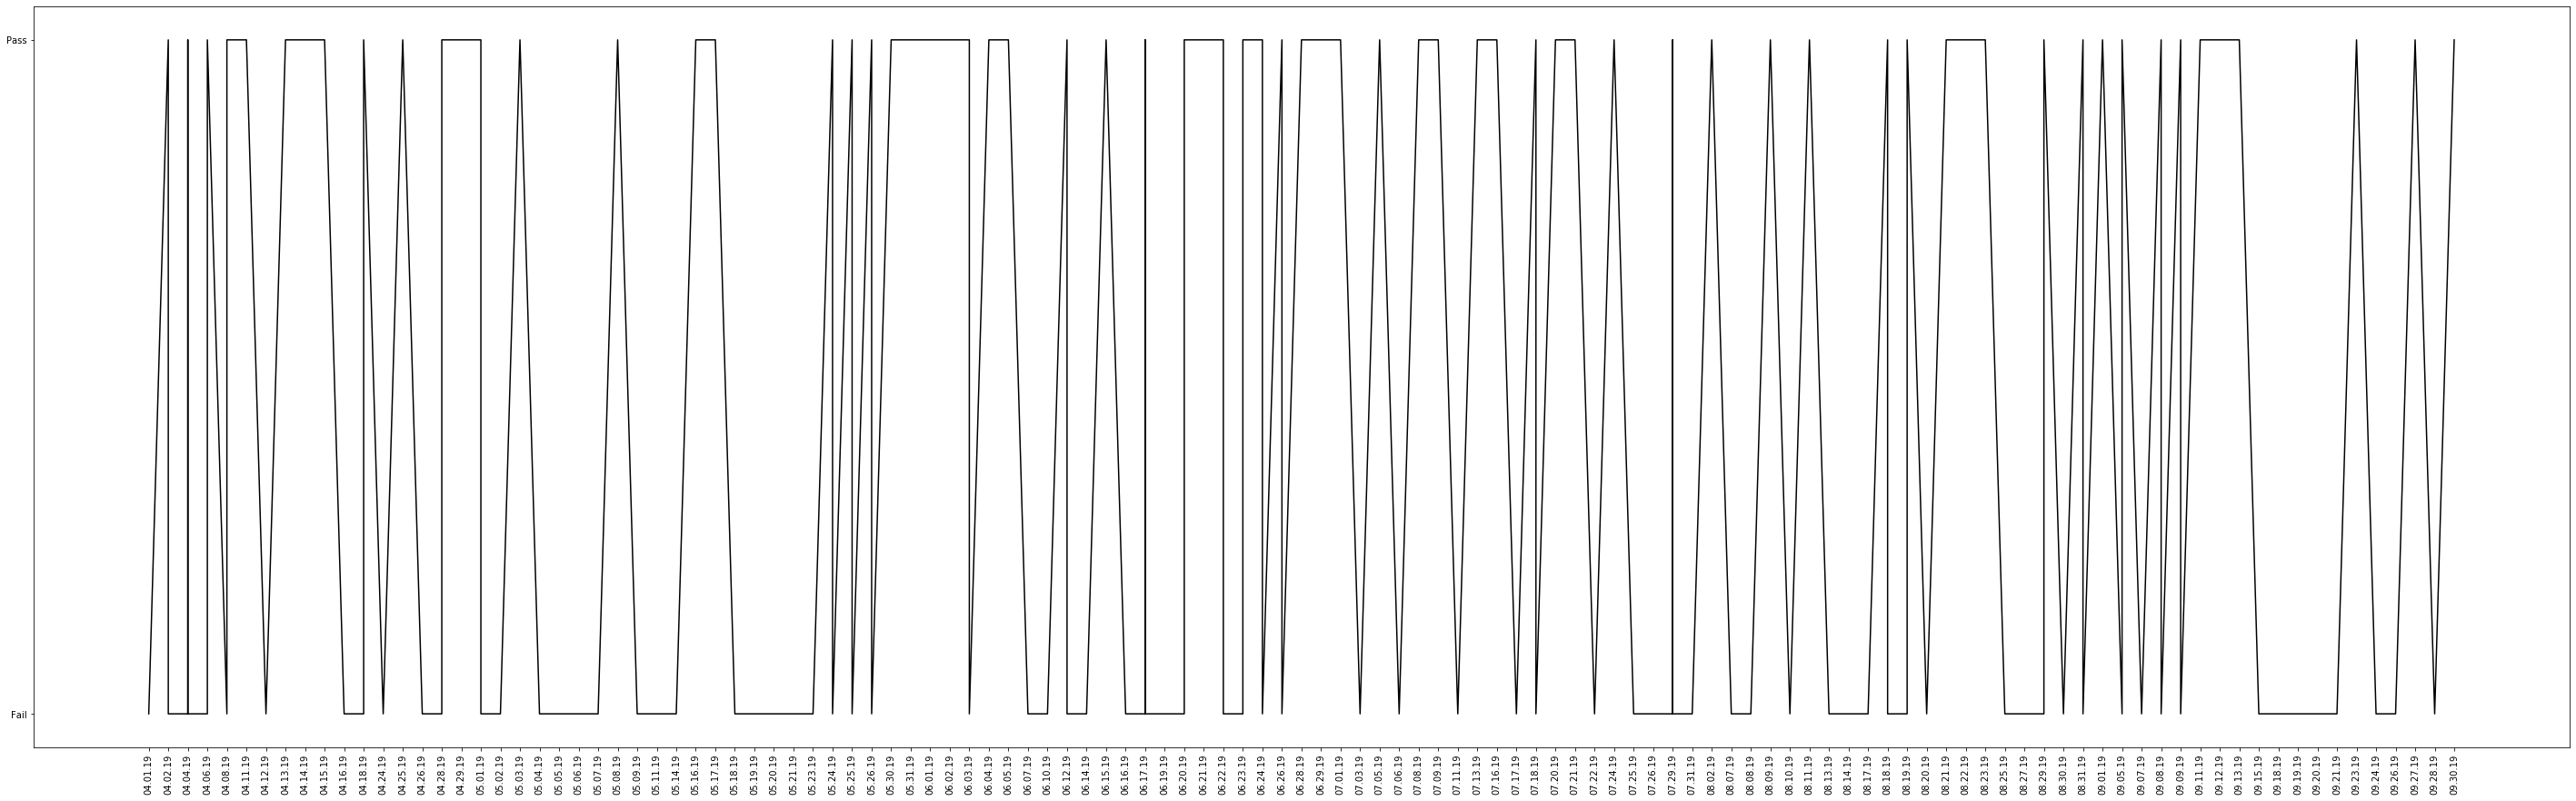

<Figure size 432x288 with 0 Axes>

In [162]:
plt.figure(figsize=(50,15))
#plt.plot(data.loc[("ACM",),"STATUS"])
plt.plot(data.loc[("Zomato",),"STATUS"],color="black")
plt.xticks(rotation=90)
plt.show()
plt.clf()


In [165]:
data1=data.loc[:,:]

fail=data1.STATUS=="Fail"
data1=data1[fail]
print(data1.loc[:,"RCA(ENV|CODE|DATA|REQ)"])

AppName  EXEDATE 
ACM      04.07.19    PROD| plt.rc("font","size"=14)| keyword can't ...
         04.08.19    STG| if i>5 |SyntaxError: invalid syntax |deci...
         04.09.19    STG| if i>5 |SyntaxError: invalid syntax |deci...
         04.10.19    PROD|data.replace(data.Name, 'NA')|Not replaci...
         04.12.19    PROD|import plotly|The plotly.plotly module is...
                                           ...                        
Zomato   09.24.19    PROD|print(('python')*a)|a: variable undefined...
         09.24.19    UAT|fun(20)|arguments undefined in function|pa...
         09.26.19    PROD|import numpy as np|numpy: Package not fou...
         09.28.19    PROD|data.replace(data.Name, 'NA')|Not replaci...
         09.28.19    PROD|import plotly|The plotly.plotly module is...
Name: RCA(ENV|CODE|DATA|REQ), Length: 1013, dtype: object


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 <a list of 42 Text xticklabel objects>)

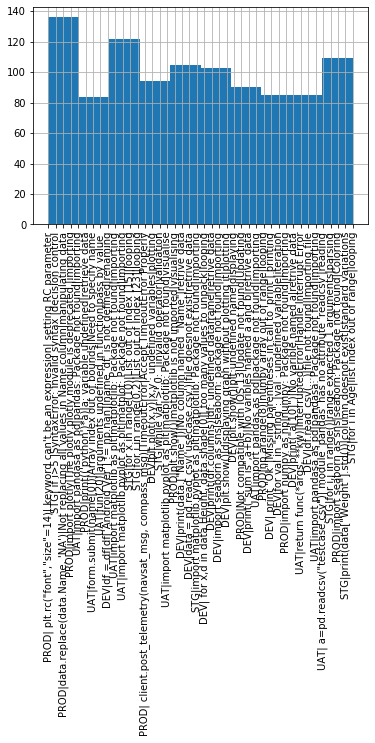

In [167]:
data1.loc[:,"RCA(ENV|CODE|DATA|REQ)"].hist()
plt.xticks(rotation=90)

In [199]:
databack.head(10)
databack.columns

Index(['TCID', 'AppName', 'EXEDATE', 'STATUS', 'RCA(ENV|CODE|DATA|REQ)'], dtype='object')

In [200]:
databack.sort_index()
databack.columns

Index(['TCID', 'AppName', 'EXEDATE', 'STATUS', 'RCA(ENV|CODE|DATA|REQ)'], dtype='object')

In [201]:
databack=databack.set_index(["EXEDATE","AppName"])


In [202]:
databack=databack.sort_index()

In [206]:
databack.loc[:,"STATUS"]

EXEDATE   AppName   
04.01.19  Facebook      Pass
          Facebook      Pass
          Guardian      Pass
          Hotstar       Fail
          Hotstar       Fail
                        ... 
09.30.19  Netflix       Pass
          TechCrunch    Pass
          UberEats      Fail
          UberEats      Pass
          Zomato        Pass
Name: STATUS, Length: 2000, dtype: object

In [214]:
for i in databack.index:
    print(i)
    print( pd.value_counts(databack.loc[i[0],"STATUS"]))

('04.01.19', 'Facebook')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Facebook')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Guardian')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Hotstar')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Hotstar')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Hotstar')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Instagram')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Netflix')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'UberEats')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.01.19', 'Zomato')
Fail    10

Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'Netflix')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'Netflix')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'Netflix')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'Netflix')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'TechCrunch')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'TechCrunch')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'Uber')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'UberEats')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.11.19', 'Zomato')
Fail    6
Pass    5
Name: STATUS, dtype: int64
('04.12.19', 'ACM')
Pass    5
Fail    5
Name: STATUS, dtype: int64
('04.12.19', 'Guardian')
Pass    5
Fail    5
Name: STATUS, dtype: int64
('04.12.19', 'Hotstar')
Pass    5
Fail    5
Name: STATUS, dtype: int64
('04.12.19', 'Netflix')
Pass    5
Fail    5
Name: STATUS, dtype: int64
('04.12.19', 'Netflix')
Pass  

Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Hotstar')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Instagram')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Instagram')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Netflix')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Netflix')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Uber')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Uber')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('04.30.19', 'Uber')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.01.19', 'Facebook')
Pass    9
Fail    8
Name: STATUS, dtype: int64
('05.01.19', 'Facebook')
Pass    9
Fail    8
Name: STATUS, dtype: int64


Name: STATUS, dtype: int64
('05.16.19', 'Guardian')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'Guardian')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'Guardian')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'Instagram')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'Instagram')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'TechCrunch')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'UberEats')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'UberEats')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'UberEats')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.16.19', 'Zomato')
Fail    10
Pass     5
Name: STATUS, dtype: int64
('05.17.19', 'Facebook')
Fail    7
Pass    4
Name: STATUS, dtype: int64
('05.17.19', 'Guardian')
Fail    7
Pass    4
Name: STATUS, dtype: int64
('05.17.19'

Fail    9
Pass    8
Name: STATUS, dtype: int64
('06.01.19', 'Uber')
Fail    9
Pass    8
Name: STATUS, dtype: int64
('06.01.19', 'Uber')
Fail    9
Pass    8
Name: STATUS, dtype: int64
('06.01.19', 'UberEats')
Fail    9
Pass    8
Name: STATUS, dtype: int64
('06.01.19', 'UberEats')
Fail    9
Pass    8
Name: STATUS, dtype: int64
('06.01.19', 'Zomato')
Fail    9
Pass    8
Name: STATUS, dtype: int64
('06.02.19', 'ACM')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'ACM')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'Hotstar')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'Netflix')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'Uber')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'UberEats')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'UberEats')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'Zomato')
Pass    6
Fail    4
Name: STATUS, dtype: int64
('06.02.19', 'Zomato')
Pass    6
Fail    4
Na

Name: STATUS, dtype: int64
('06.22.19', 'Instagram')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'Netflix')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'Netflix')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'Netflix')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'UberEats')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'UberEats')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'UberEats')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'Zomato')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.22.19', 'Zomato')
Fail    7
Pass    6
Name: STATUS, dtype: int64
('06.23.19', 'ACM')
Pass    12
Fail     7
Name: STATUS, dtype: int64
('06.23.19', 'ACM')
Pass    12
Fail     7
Name: STATUS, dtype: int64
('06.23.19', 'Facebook')
Pass    12
Fail     7
Name: STATUS, dtype: int64
('06.23.19', 'Facebook')
Pass    12
Fail     7
Name: STATUS, dtype: int64
('06.23.19', 'Guardian')
Pass    12
Fail     

Fail    11
Pass     4
Name: STATUS, dtype: int64
('07.06.19', 'UberEats')
Fail    11
Pass     4
Name: STATUS, dtype: int64
('07.06.19', 'UberEats')
Fail    11
Pass     4
Name: STATUS, dtype: int64
('07.06.19', 'Zomato')
Fail    11
Pass     4
Name: STATUS, dtype: int64
('07.07.19', 'ACM')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'ACM')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Facebook')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Guardian')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Guardian')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Guardian')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Hotstar')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Netflix')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Uber')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.07.19', 'Uber')
Fail    6
Pass    4
Name: STATUS, dtype: int64
('07.08.19', 'Facebook')
Pass  

Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'Instagram')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'Instagram')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'Netflix')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'TechCrunch')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'Uber')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'Uber')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'UberEats')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'UberEats')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'Zomato')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.24.19', 'Zomato')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.25.19', 'Facebook')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.25.19', 'Facebook')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.25.19', 'Guardian')
Fail    8
Pass    5
Name: STATUS, dtype: int64
('07.25.19', 'Hotstar')
Fa

Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Facebook')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Guardian')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Guardian')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Instagram')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Instagram')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Instagram')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Netflix')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Netflix')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'TechCrunch')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'Uber')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'UberEats')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.05.19', 'UberEats')
Pass    9
Fail    5
Name: STATUS, dtype: int64
('08.06.19', 'ACM')
Fail    5
Pass    2
Name: STATUS, dtype: int64
('08.06.19', 'ACM')
Fai

Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'Netflix')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'Netflix')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'TechCrunch')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'TechCrunch')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'TechCrunch')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'TechCrunch')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'Uber')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'Uber')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'UberEats')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.24.19', 'UberEats')
Fail    8
Pass    7
Name: STATUS, dtype: int64
('08.25.19', 'ACM')
Fail    11
Pass     8
Name: STATUS, dtype: int64
('08.25.19', 'ACM')
Fail    11
Pass     8
Name: STATUS, dtype: int64
('08.25.19', 'Guardian')
Fail    11
Pass     8
Name: STATUS, dtype: int64
('08.25.19', 'Guardian'

Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Facebook')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Facebook')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Guardian')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Guardian')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Netflix')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Uber')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Uber')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'UberEats')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.11.19', 'Zomato')
Pass    7
Fail    3
Name: STATUS, dtype: int64
('09.12.19', 'Facebook')
Pass    9
Fail    2
Name: STATUS, dtype: int64
('09.12.19', 'Facebook')
Pass    9
Fail    2
Name: STATUS, dtype: int64
('09.12.19', 'Guardian')
Pass    9
Fail    2
Name: STATUS, dtype: int64
('09.12.19', 'Guardian')
Pass    9
Fail    2
Name: STATUS, dtype: int64
('09.12.19', 'Instagram')
Pa

Name: STATUS, dtype: int64
('09.28.19', 'Facebook')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Guardian')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Guardian')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Hotstar')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Hotstar')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Hotstar')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Hotstar')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Netflix')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Netflix')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'Netflix')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'TechCrunch')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'TechCrunch')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19', 'TechCrunch')
Pass    12
Fail     9
Name: STATUS, dtype: int64
('09.28.19',